In [1]:
#Basic imports

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns

In [2]:
#Create DataFrame with Null and duplicates

data = [{'Name': 'Nikhil', 'Age': 24, 'Gender': 'M', 'Weight': 63.8, 'Height': 180},
       {'Name': 'John', 'Age': 25, 'Weight': 76.8, 'Height': 180},
       {'Name': 'Mary', 'Age': 26, 'Gender': 'F', 'Weight': 55.8, 'Height': 180},
       {'Name': 'Micheal', 'Gender': 'M', 'Weight': 81.8, 'Height': 180},
       {'Name': 'Smith', 'Age': 48, 'Gender': 'M', 'Height': 180},
       {'Name': 'Virat', 'Age': 33, 'Gender': 'M', 'Weight': 78.8, 'Height': 180},
       {'Name': 'Nikhil', 'Age': 24, 'Gender': 'M', 'Weight': 63.8, 'Height': 180},
       {'Name': 'Virat', 'Age': 33, 'Gender': 'M', 'Weight': 78.8, 'Height': 180},
       {'Name': 'Anushka', 'Age': 20, 'Gender': 'F', 'Height': 180},
       {'Name': 'Jini', 'Age': 22, 'Gender': 'F', 'Weight': 53.8}]

df1 = pd.DataFrame(data, columns=['Name','Age','Gender','Weight','Height'])

In [3]:
df1

,Name,Age,Gender,Weight,Height
0,Nikhil,24.0,M,63.8,180.0
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
5,Virat,33.0,M,78.8,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0
9,Jini,22.0,F,53.8,NaN


In [4]:
#Always make copy of original dataSet in order to rollback
df = df1.copy()

In [5]:
#### DUPLICATE VALUES

In [6]:
#We check duplicate rows
df.duplicated()         #True represent that particular row is duplicated

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8    False
9    False
dtype: bool

In [7]:
dups = df.duplicated()           #We seperately see duplicated rows via this
df[dups]

,Name,Age,Gender,Weight,Height
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0


In [8]:
# Identify rows with duplicate values in only certain columns
dups = df.duplicated(['Height'])
df[dups]

,Name,Age,Gender,Weight,Height
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
5,Virat,33.0,M,78.8,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0


In [9]:
dups = df.duplicated(['Age'])
df[dups]

,Name,Age,Gender,Weight,Height
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0


In [10]:
# By- Default it keep the first Duplicates and drop another if you want to keep last duplicate using param 'keep' = 'last'

df.drop_duplicates()      #Notice index 6 and 7 is missing and index 0 , 5 stay

,Name,Age,Gender,Weight,Height
0,Nikhil,24.0,M,63.8,180.0
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
5,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0
9,Jini,22.0,F,53.8,NaN


In [11]:
df.drop_duplicates(keep='last')    #Notice index 0 and 5 is missing and index 6 , 7 stay

,Name,Age,Gender,Weight,Height
1,John,25.0,NaN,76.8,180.0
2,Mary,26.0,F,55.8,180.0
3,Micheal,NaN,M,81.8,180.0
4,Smith,48.0,M,NaN,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0
8,Anushka,20.0,F,NaN,180.0
9,Jini,22.0,F,53.8,NaN


In [12]:
#### NULL VALUES

In [13]:
#Always make copy of original dataSet in order to rollback
df_copy = df1.copy()

<AxesSubplot:>

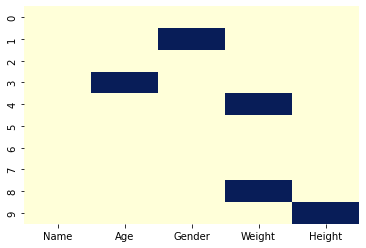

In [14]:
#Visualize NULL values
sns.heatmap(df_copy.isnull(), cbar=False, cmap="YlGnBu")

In [15]:
# Mathamatically visualize null values
df_copy.isna().sum()

Name      0
Age       1
Gender    1
Weight    2
Height    1
dtype: int64

In [16]:
# In order to remove null we simply drop if nulls r not in majority

df_copy.dropna()

,Name,Age,Gender,Weight,Height
0,Nikhil,24.0,M,63.8,180.0
2,Mary,26.0,F,55.8,180.0
5,Virat,33.0,M,78.8,180.0
6,Nikhil,24.0,M,63.8,180.0
7,Virat,33.0,M,78.8,180.0
